# Primero importamos las librerías necesarias en nuestro trabajo

In [10]:
# Load pandas
import pandas as pd
# Load numpy
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Una vez tengamos las librerías cargadas,  recogemos la información de los múltiples csv que tenemos y la juntamos en un solo DataFrame.

### Además, aprovecharemos para ordenar el DataFrame primero por año y después de mes.

In [2]:
# Obtenemos los archivos de contaminación de la comunidad de Madrid.
fileList = ! ls ./Madrid/

# Creamos los nombres de las columnas.
columns=['ESTACION', 'MAGNITUD', 'TECNICA', 'DATO HORARIO', 'ANIO', 'MES', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
columns2010=['ESTACION', 'MAGNITUD', 'TECNICA', 'DATO HORARIO', 'ANIO', 'MES', 'DEL', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

# Creamos el DataFrame padre, donde se concatenarán los demás.
data = pd.DataFrame(columns=columns)

# Creamos un acumulador porque hasta el año 2010 se utiliza una codificación y a partir de ahí, otra distinta.
acc=0
# Añadimos todos los archivos en un mismo dataFrame para poder manipularlo.
for file_txt in fileList:
    
    # En caso de fichero anterior a 2010 o del 2010.
    if(acc < 10):
        table = pd.read_fwf('./Madrid/'+file_txt, widths=[8,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6], header=None, nwors = 3, names=columns2010)
        table = table.drop('DEL', 1)
    # En caso de fichero moderno.
    else:
        table = pd.read_fwf('./Madrid/'+file_txt, widths=[8,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6], header=None, nwors = 3, names=columns)
    acc=acc+1
    data =pd.concat([data,table])
    
# Ordenamos el DataFrame primero por año y después por mes.
data.sort_values(['ANIO', 'MES'], ascending=True)
# Reorganizamos el índice del DataFrame para que no haya indices repetidos.
data.set_index([range(0,len(data))], inplace=True)

data.head(5)

,ESTACION,MAGNITUD,TECNICA,DATO HORARIO,ANIO,MES,1,2,3,4,...,22,23,24,25,26,27,28,29,30,31
0,28079001,1,38,4,1,1,00.00N,00.00N,16.31V,17.04V,...,38.28V,17.27V,18.86V,15.91V,12.40V,19.51V,14.93V,30.14V,52.09V,51.93V
1,28079001,1,38,4,1,2,42.59V,53.49V,46.64V,23.04V,...,70.90V,54.40V,22.71V,15.07V,26.85V,22.15V,25.24V,00.00N,00.00N,00.00N
2,28079001,1,38,4,1,3,19.01V,17.30V,13.40V,10.58V,...,15.41V,31.62V,13.48V,6.650V,9.940V,13.57V,15.91V,13.81V,16.21V,18.24V
3,28079001,1,38,4,1,4,9.770V,15.25V,12.29V,11.29V,...,14.35V,11.27V,11.34V,13.20V,14.70V,14.66V,12.20V,17.29V,11.26V,00.00N
4,28079001,1,38,4,1,5,7.180V,8.700V,17.22V,18.64V,...,12.50V,15.35V,14.80V,16.16V,12.85V,9.280V,23.50V,18.99V,17.80V,19.62V


In [3]:
len(data)

34606

# Filtrado de datos
### Según el dosier facilitado por el ayuntamiento de Madrid, todos los datos que no contengan en su último carácter una 'V', no podrán ser considerados verificados.

### 1- Primero hay que decidir que mágnitudes queremos medir para extraerlas y analizarlas.


### 2- Una vez tengamos los datos filtrados, hay que formatear el dataFrame

In [4]:
# PD: Se podría mejorar si se pusieran los valores correspondiendo con una regresión lineal de los valores si validados.
for d in data.index.values:
    for num in range(1,32):
        if data[str(num)][d][-1:].lower() == 'v':
            data[str(num)][d]=float(data[str(num)][d][:-1])
        else: data[str(num)][d]=0.00
            
len(data)

34606

In [5]:
data.head(10)

,ESTACION,MAGNITUD,TECNICA,DATO HORARIO,ANIO,MES,1,2,3,4,...,22,23,24,25,26,27,28,29,30,31
0,28079001,1,38,4,1,1,0,0,16.31,17.04,...,38.28,17.27,18.86,15.91,12.4,19.51,14.93,30.14,52.09,51.93
1,28079001,1,38,4,1,2,42.59,53.49,46.64,23.04,...,70.9,54.4,22.71,15.07,26.85,22.15,25.24,0,0,0
2,28079001,1,38,4,1,3,19.01,17.3,13.4,10.58,...,15.41,31.62,13.48,6.65,9.94,13.57,15.91,13.81,16.21,18.24
3,28079001,1,38,4,1,4,9.77,15.25,12.29,11.29,...,14.35,11.27,11.34,13.2,14.7,14.66,12.2,17.29,11.26,0
4,28079001,1,38,4,1,5,7.18,8.7,17.22,18.64,...,12.5,15.35,14.8,16.16,12.85,9.28,23.5,18.99,17.8,19.62
5,28079001,1,38,4,1,6,14.61,12.68,13.67,17.04,...,22.62,23.33,19.97,16.58,15.66,13.83,13.95,24.35,23.51,0
6,28079001,1,38,4,1,7,24.48,17.74,16.13,15.25,...,12.18,17.31,13.55,15.15,13.25,11.97,8.79,6.02,12.13,11.11
7,28079001,1,38,4,1,8,10.59,8.36,9.82,7.26,...,15.72,23.56,29.44,11.85,7.42,10.64,9.35,8.88,8.33,8.7
8,28079001,1,38,4,1,9,7.18,11.21,9.92,10.42,...,6.19,5.23,8.55,12.13,16.67,15.56,9.33,11.41,9.95,0
9,28079001,1,38,4,1,10,15.71,21.46,12.56,13.2,...,11.7,10.75,17.47,0,0,21.97,15.66,23.89,27.48,23.9


In [1]:
data.to_csv("bigFile.csv", sep=',')

NameError: name 'data' is not defined

In [ ]:
# Creamos los nombres de las columnas.
columns=['ESTACION', 'MAGNITUD', 'TECNICA', 'DATO HORARIO', 'ANIO', 'MES', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

# Creamos el DataFrame
data = pd.read_csv('./bigFile.csv', sep=',', low_memory=False, index_col=['Unnamed: 0'])

data.head(3)

# Una vez tenemos el DataFrame filtrado de errores, procedemos a crear un nuevo DataFrame con un formato más cómodo para su lectura, donde cada día corrresponderá con una sola fila.

In [ ]:
# Hay que crear una fila por cada día.

finalData = pd.DataFrame(columns=['DATE','ESTACION','MAGNITUD','TECNICA','VALUE'])

for d in data.index.values:
    dt={}
    for n in range(1,32):
        try:
            if data[str(n)][d] != 0:
                if data['ANIO'][d]<10:
                    datetime = datetime.strptime('200'+str(data['ANIO'][d])+'-'+str(data['MES'][d])+'-'+str(n)+' '+str(data['DATO HORARIO'][d]), '%Y-%m-%d %H')
                else:
                    datetime = datetime.strptime('20'+str(data['ANIO'][d])+'-'+str(data['MES'][d])+'-'+str(n)+' '+str(data['DATO HORARIO'][d]), '%Y-%m-%d %H')
                
                dt[n]={'DATE':datetime,'ESTACION':data['ESTACION'][d],'MAGNITUD':data['MAGNITUD'][d],'TECNICA':data['TECNICA'][d],'VALUE': float(data[str(n)][d])}
                
        except:
            dt[n]={'DATE':datetime,'ESTACION':data['ESTACION'][d],'MAGNITUD':data['MAGNITUD'][d],'TECNICA':data['TECNICA'][d],'VALUE': float(data[str(n)][d])}
                
            print(dt)
    dt= pd.DataFrame.from_dict(dt, orient='index')
    finalData= pd.concat([finalData, dt], ignore_index=True)
finalData.reset_index()
len(finalData)

In [ ]:
finalData.to_csv("ultimateFile.csv", sep=',')

# Separamos los datos en dos conjuntos diferentes, el primero de entrenamiento, que contendrá el 80% de los datos y el segundo el de test, con el 20% restante.

### Para esta aproximación utilizaremos los datos de contaminación referidos al Monóxido de carbono, que es uno de los elementos que otorga mayor contaminación a las ciudades por el tráfico y otros aspectos.

In [18]:
data = pd.read_csv('ultimateFile.csv', index_col=['Unnamed: 0'])
data.head()

,DATE,ESTACION,MAGNITUD,TECNICA,VALUE
0,2001-01-03 04:00:00,28079001,1,38,16.31
1,2001-01-04 04:00:00,28079001,1,38,17.04
2,2001-01-05 04:00:00,28079001,1,38,15.84
3,2001-01-06 04:00:00,28079001,1,38,15.49
4,2001-01-07 04:00:00,28079001,1,38,18.65


# Exportamos los archivos en formato csv según el contaminante que haya recogido para separarlos.

In [46]:
for e in enumerate(data['MAGNITUD'].unique()):
    d = data[data['MAGNITUD']==e[1]]
    d.to_csv('./datos_por_contaminante/magnitud_'+str(e[1])+'.csv', sep=',')
    

# Recogemos todos los archivos y incluimos cada magnitud en una variable distinta

In [66]:
# Exportamos los archivos en formato csv según el contaminante que haya recogido para separarlos.

_1 = pd.read_csv('./datos_por_contaminante/magnitud_1.csv', index_col='Unnamed: 0')
_10 = pd.read_csv('./datos_por_contaminante/magnitud_10.csv', index_col='Unnamed: 0')
_12 = pd.read_csv('./datos_por_contaminante/magnitud_12.csv', index_col='Unnamed: 0')
_14 = pd.read_csv('./datos_por_contaminante/magnitud_14.csv', index_col='Unnamed: 0')
_20 = pd.read_csv('./datos_por_contaminante/magnitud_20.csv', index_col='Unnamed: 0')
_30 = pd.read_csv('./datos_por_contaminante/magnitud_30.csv', index_col='Unnamed: 0')
_35 = pd.read_csv('./datos_por_contaminante/magnitud_35.csv', index_col='Unnamed: 0')
_37 = pd.read_csv('./datos_por_contaminante/magnitud_37.csv', index_col='Unnamed: 0')
_38 = pd.read_csv('./datos_por_contaminante/magnitud_38.csv', index_col='Unnamed: 0')
_39 = pd.read_csv('./datos_por_contaminante/magnitud_39.csv', index_col='Unnamed: 0')
_42 = pd.read_csv('./datos_por_contaminante/magnitud_42.csv', index_col='Unnamed: 0')
_44 = pd.read_csv('./datos_por_contaminante/magnitud_44.csv', index_col='Unnamed: 0')
_58 = pd.read_csv('./datos_por_contaminante/magnitud_58.csv', index_col='Unnamed: 0')
_6 = pd.read_csv('./datos_por_contaminante/magnitud_6.csv', index_col='Unnamed: 0')
_7 = pd.read_csv('./datos_por_contaminante/magnitud_7.csv', index_col='Unnamed: 0')
_8 = pd.read_csv('./datos_por_contaminante/magnitud_8.csv', index_col='Unnamed: 0')
_9 = pd.read_csv('./datos_por_contaminante/magnitud_9.csv', index_col='Unnamed: 0')
    

# Creamos un gráfico de predicción de regresión lineal con la librería de scikit learn y lo guardamos en la carpeta de python charts.

Dioxido de nitrogeno
('Coefficients: \n', array([[ -4.70991497e-05]]))
Mean squared error: 724.06
Variance score: -0.18


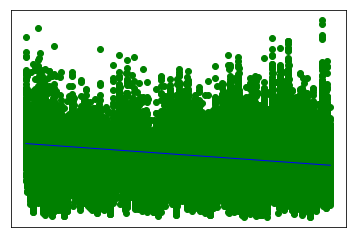

magnitud_1oxidos de nitrogeno
('Coefficients: \n', array([[ -7.58549409e-05]]))
Mean squared error: 10943.10
Variance score: -0.03


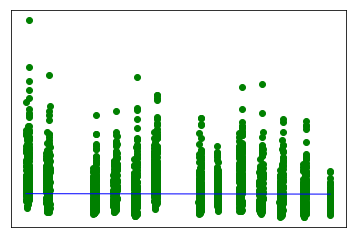

magnitud_Benceno
('Coefficients: \n', array([[ -2.38198158e-06]]))
magnitud_Benceno.csv Dont get it
magnitud_Dioxido de azufre
('Coefficients: \n', array([[ -7.95799112e-06]]))
Mean squared error: 119.00
Variance score: -0.03


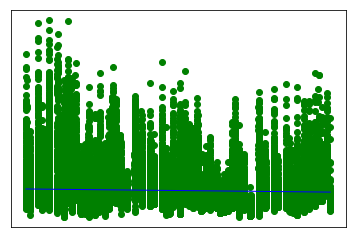

magnitud_Etilbenceno
('Coefficients: \n', array([[ -2.77544937e-06]]))
magnitud_Etilbenceno.csv Dont get it
magnitud_Hidrocarburos no metanicos
('Coefficients: \n', array([[  3.76107680e-08]]))
magnitud_Hidrocarburos no metanicos.csv Dont get it
magnitud_Hidrocarburos totales
('Coefficients: \n', array([[ -2.16041158e-08]]))
magnitud_Hidrocarburos totales.csv Dont get it
magnitud_Metalxileno
('Coefficients: \n', array([[ -8.85568635e-06]]))
magnitud_Metalxileno.csv Dont get it
magnitud_Monoxido de carbono
('Coefficients: \n', array([[ -5.06198072e-07]]))
Mean squared error: 0.30
Variance score: -0.03


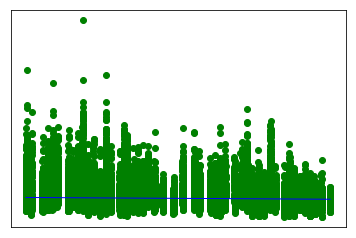

magnitud_Ortoxileno
('Coefficients: \n', array([[ -3.29609131e-06]]))
magnitud_Ortoxileno.csv Dont get it
magnitud_Ozono
('Coefficients: \n', array([[  2.65370832e-05]]))
Mean squared error: 399.00
Variance score: -0.08


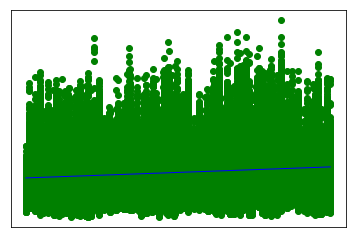

magnitud_Paraxileno
('Coefficients: \n', array([[ -3.05476268e-06]]))
magnitud_Paraxileno.csv Dont get it
magnitud_particulas 10
('Coefficients: \n', array([[ -2.56611434e-05]]))
Mean squared error: 356.63
Variance score: -0.14


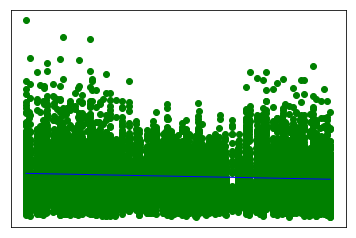

magnitud_Particulas 2,5
('Coefficients: \n', array([[ -1.50890606e-05]]))
magnitud_Particulas 2,5.csv Dont get it
magnitud_Toleuno
('Coefficients: \n', array([[ -1.18329489e-05]]))
magnitud_Toleuno.csv Dont get it
Monoxido de nitrogeno
('Coefficients: \n', array([[ -1.82387281e-05]]))
Monoxido de nitrogeno.csv Dont get it


In [211]:
ls= !ls ./datos_por_contaminante/
for fileCSV in ls:
    try:
        data = pd.read_csv('./datos_por_contaminante/'+fileCSV, index_col='Unnamed: 0')
        # Split the data into training/testing sets
        num = int(len(_1)*0.8)
        finalData_X_test  = data.index.values[:-num][:,None]
        finalData_X_train = data.index.values[-num:][:,None]

        # Split the targets into training/testing sets
        finalData_y_train = data['VALUE'][-num:][:,None]
        finalData_y_test = data['VALUE'][:-num][:,None]

        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(finalData_X_train, finalData_y_train)

        print(fileCSV[:-4])
        # The coefficients
        print('Coefficients: \n', regr.coef_)
        # The mean squared error
        print("Mean squared error: %.2f"
              % np.mean((regr.predict(finalData_X_test) - finalData_y_test) ** 2))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % regr.score(finalData_X_test, finalData_y_test))

        # Plot outputs
        plt.scatter(finalData_X_test, finalData_y_test,  color='green')
        plt.plot(finalData_X_test, regr.predict(finalData_X_test), color='blue',linewidth=1)

        plt.xticks(())
        plt.yticks(())
        plt.figure()
        plt.show()
        plt.savefig('./Python Charts/'+fileCSV[:-4]+'.png', dpi=100)
       
    except:
        print(fileCSV+' Dont get it')